In [18]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../fuzzy-torch') # or just install the module
sys.path.append('../../fuzzy-tools') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

In [19]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.utils import get_model_names

lcset_name = 'test'
rootdir = '../save'
method = 'spm-mcmc-estw'
cfilename = f'survey=alerceZTFv7.1~bands=gr~mode=onlySNe~method={method}'
kf = '.'

model_names = get_model_names(rootdir, cfilename, kf, lcset_name)
#model_names = [mn for mn in model_names if 'SelfAttn' in mn]
#model_names = [mn for mn in model_names if 'b=129' in mn]
model_names

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


['mdl=ParallelTimeModAttn~input_dims=1~m=2~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=0*24**-1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~b=129',
 'mdl=SerialTimeModAttn~input_dims=1~m=2~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=0*24**-1~enc_emb=128-128~dec_emb=g1-g128.r1-r128~b=129',
 'mdl=ParallelTimeModAttn~input_dims=1~m=2~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=12*24**-1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~b=129',
 'mdl=ParallelTimeModAttn~input_dims=1~m=4~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=0*24**-1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~b=129',
 'mdl=SerialTimeModAttn~input_dims=1~m=4~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=0*24**-1~enc_emb=128-128~dec_emb=g1-g128.r1-r128~b=129',
 'mdl=ParallelTimeModAttn~input_dims=1~m=2~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=24*24**-1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~b=129',
 'mdl=SerialTimeModAttn~input_dims=1~m=8

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
mdl=ParallelRNN~input_dims=1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~cell=GRU~b=129 ['0@id=1000c0', '0@id=1000c1', '0@id=1000c2'](3#)
mdl=ParallelRNN~input_dims=1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~cell=LSTM~b=129 ['0@id=1000c0', '0@id=1000c1', '0@id=1000c2'](3#)
mdl=ParallelTimeModAttn~input_dims=1~m=16~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=0*24**-1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~b=129 ['0@id=1000c0', '0@id=1000c1', '0@id=1000c2', '0@id=1001c0', '0@id=1001c1', '0@id=1001c2', '0@id=1002c0', '0@id=1002c1', '0@id=1002c2', '1@id=1000c0', '1@id=1000c1', '1@id=1000c2', '1@id=1001c0', '1@id=1001c1', '1@id=1001c2', '1@id=1002c0', '1@id=1002c1', '1@id=1002c2', '2@id=1000c0', '2@id=1000c1', '2@id=1000c2', '2@id=1001c0', '2@id=1001c1', '2@id=1001c2', '2@id=1001c0', '2@id=1001c0', '2@id=1000c0', '3@id=1000c0', '3@id=1000c1', '3@id=1000c2', '3@id=1001c0', '

mdl=SerialTimeModAttn~input_dims=1~m=4~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=0*24**-1~enc_emb=128-128~dec_emb=g1-g128.r1-r128~b=129 ['0@id=1000c0', '0@id=1000c1', '0@id=1000c2', '0@id=1001c0', '0@id=1001c1', '0@id=1001c2', '0@id=1002c0', '0@id=1002c1', '0@id=1002c2', '1@id=1000c0', '1@id=1000c1', '1@id=1000c2', '1@id=1001c0', '1@id=1001c1', '1@id=1001c2', '1@id=1002c0', '1@id=1002c1', '1@id=1002c2', '2@id=1000c0', '2@id=1000c1', '2@id=1000c2', '2@id=1001c0', '2@id=1001c1', '2@id=1001c2', '2@id=1002c0', '2@id=1002c1', '2@id=1002c2', '3@id=1000c0', '3@id=1000c1', '3@id=1000c2', '3@id=1001c0', '3@id=1001c1', '3@id=1001c2', '3@id=1001c0', '3@id=1001c0', '3@id=1000c0', '4@id=1000c0', '4@id=1000c1', '4@id=1000c2', '4@id=1001c0', '4@id=1001c1', '4@id=1001c2', '4@id=1001c0', '4@id=1001c0', '4@id=1000c0'](45#)
mdl=SerialTimeModAttn~input_dims=1~m=8~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=0*24**-1~enc_emb=128-128~dec_emb=g1-g128.r1-r128~b=129 ['0@id=1000c0', '0@id

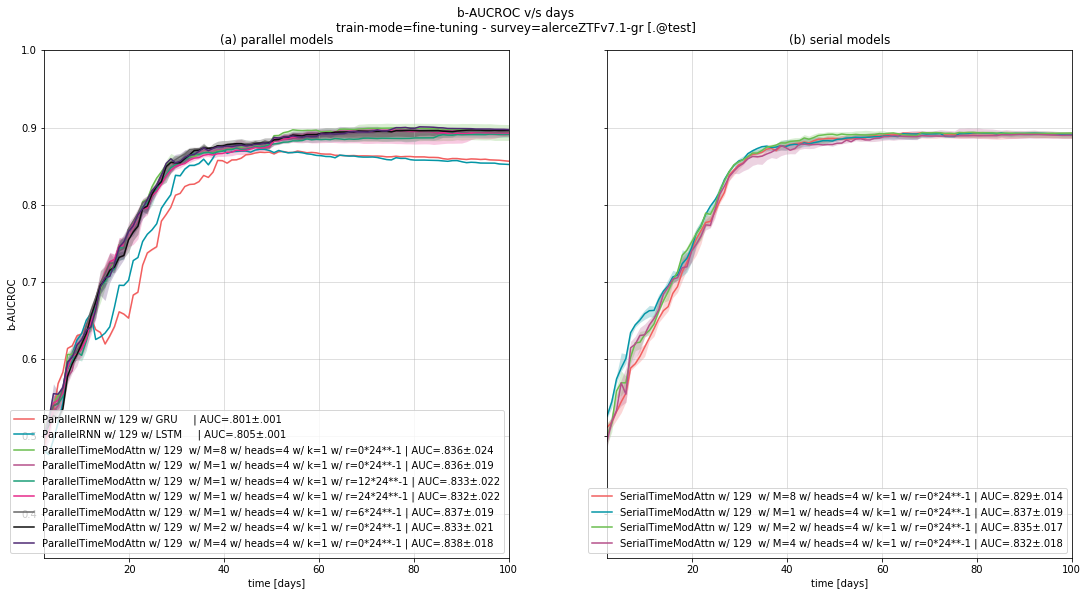

mdl=ParallelRNN~input_dims=1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~cell=GRU~b=129 ['0@id=1000c0', '0@id=1000c1', '0@id=1000c2'](3#)
mdl=ParallelRNN~input_dims=1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~cell=LSTM~b=129 ['0@id=1000c0', '0@id=1000c1', '0@id=1000c2'](3#)
mdl=ParallelTimeModAttn~input_dims=1~m=16~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=0*24**-1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~b=129 ['0@id=1000c0', '0@id=1000c1', '0@id=1000c2', '0@id=1001c0', '0@id=1001c1', '0@id=1001c2', '0@id=1002c0', '0@id=1002c1', '0@id=1002c2', '1@id=1000c0', '1@id=1000c1', '1@id=1000c2', '1@id=1001c0', '1@id=1001c1', '1@id=1001c2', '1@id=1002c0', '1@id=1002c1', '1@id=1002c2', '2@id=1000c0', '2@id=1000c1', '2@id=1000c2', '2@id=1001c0', '2@id=1001c1', '2@id=1001c2', '2@id=1001c0', '2@id=1001c0', '2@id=1000c0', '3@id=1000c0', '3@id=1000c1', '3@id=1000c2', '3@id=1001c0', '3@id=1001c1', '3@id=1001c2', '3@id=1001c0', '3@id=1001c0', '3@id=1000c0', '4@id=1000c0',

mdl=SerialTimeModAttn~input_dims=1~m=4~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=0*24**-1~enc_emb=128-128~dec_emb=g1-g128.r1-r128~b=129 ['0@id=1000c0', '0@id=1000c1', '0@id=1000c2', '0@id=1001c0', '0@id=1001c1', '0@id=1001c2', '0@id=1002c0', '0@id=1002c1', '0@id=1002c2', '1@id=1000c0', '1@id=1000c1', '1@id=1000c2', '1@id=1001c0', '1@id=1001c1', '1@id=1001c2', '1@id=1002c0', '1@id=1002c1', '1@id=1002c2', '2@id=1000c0', '2@id=1000c1', '2@id=1000c2', '2@id=1001c0', '2@id=1001c1', '2@id=1001c2', '2@id=1002c0', '2@id=1002c1', '2@id=1002c2', '3@id=1000c0', '3@id=1000c1', '3@id=1000c2', '3@id=1001c0', '3@id=1001c1', '3@id=1001c2', '3@id=1001c0', '3@id=1001c0', '3@id=1000c0', '4@id=1000c0', '4@id=1000c1', '4@id=1000c2', '4@id=1001c0', '4@id=1001c1', '4@id=1001c2', '4@id=1001c0', '4@id=1001c0', '4@id=1000c0'](45#)
mdl=SerialTimeModAttn~input_dims=1~m=8~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=0*24**-1~enc_emb=128-128~dec_emb=g1-g128.r1-r128~b=129 ['0@id=1000c0', '0@id

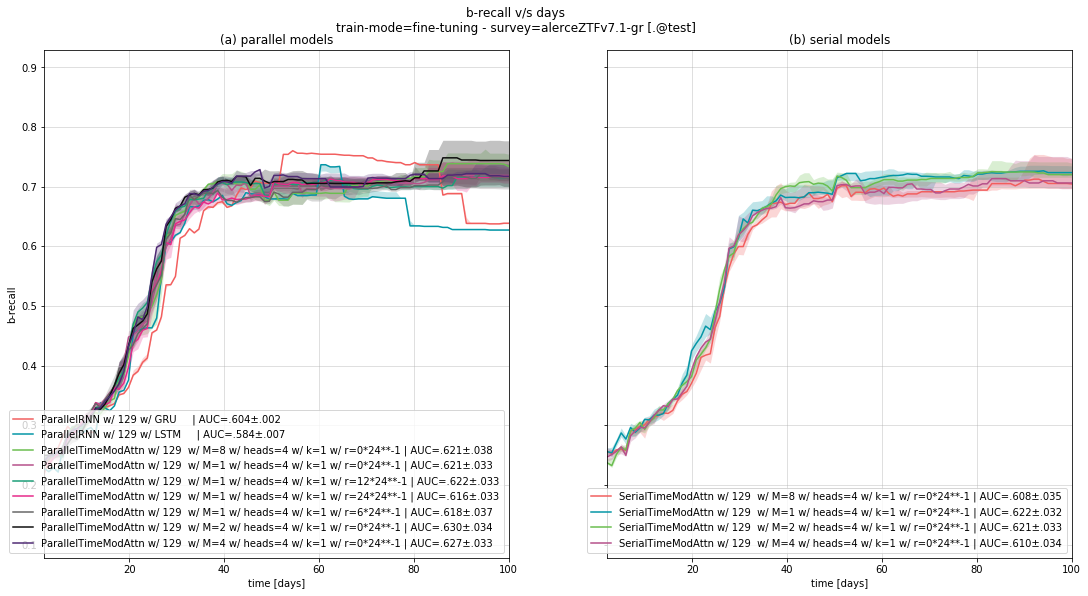

mdl=ParallelRNN~input_dims=1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~cell=GRU~b=129 ['0@id=1000c0', '0@id=1000c1', '0@id=1000c2'](3#)
mdl=ParallelRNN~input_dims=1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~cell=LSTM~b=129 ['0@id=1000c0', '0@id=1000c1', '0@id=1000c2'](3#)
mdl=ParallelTimeModAttn~input_dims=1~m=16~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=0*24**-1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~b=129 ['0@id=1000c0', '0@id=1000c1', '0@id=1000c2', '0@id=1001c0', '0@id=1001c1', '0@id=1001c2', '0@id=1002c0', '0@id=1002c1', '0@id=1002c2', '1@id=1000c0', '1@id=1000c1', '1@id=1000c2', '1@id=1001c0', '1@id=1001c1', '1@id=1001c2', '1@id=1002c0', '1@id=1002c1', '1@id=1002c2', '2@id=1000c0', '2@id=1000c1', '2@id=1000c2', '2@id=1001c0', '2@id=1001c1', '2@id=1001c2', '2@id=1001c0', '2@id=1001c0', '2@id=1000c0', '3@id=1000c0', '3@id=1000c1', '3@id=1000c2', '3@id=1001c0', '3@id=1001c1', '3@id=1001c2', '3@id=1001c0', '3@id=1001c0', '3@id=1000c0', '4@id=1000c0',

mdl=SerialTimeModAttn~input_dims=1~m=4~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=0*24**-1~enc_emb=128-128~dec_emb=g1-g128.r1-r128~b=129 ['0@id=1000c0', '0@id=1000c1', '0@id=1000c2', '0@id=1001c0', '0@id=1001c1', '0@id=1001c2', '0@id=1002c0', '0@id=1002c1', '0@id=1002c2', '1@id=1000c0', '1@id=1000c1', '1@id=1000c2', '1@id=1001c0', '1@id=1001c1', '1@id=1001c2', '1@id=1002c0', '1@id=1002c1', '1@id=1002c2', '2@id=1000c0', '2@id=1000c1', '2@id=1000c2', '2@id=1001c0', '2@id=1001c1', '2@id=1001c2', '2@id=1002c0', '2@id=1002c1', '2@id=1002c2', '3@id=1000c0', '3@id=1000c1', '3@id=1000c2', '3@id=1001c0', '3@id=1001c1', '3@id=1001c2', '3@id=1001c0', '3@id=1001c0', '3@id=1000c0', '4@id=1000c0', '4@id=1000c1', '4@id=1000c2', '4@id=1001c0', '4@id=1001c1', '4@id=1001c2', '4@id=1001c0', '4@id=1001c0', '4@id=1000c0'](45#)
mdl=SerialTimeModAttn~input_dims=1~m=8~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=0*24**-1~enc_emb=128-128~dec_emb=g1-g128.r1-r128~b=129 ['0@id=1000c0', '0@id

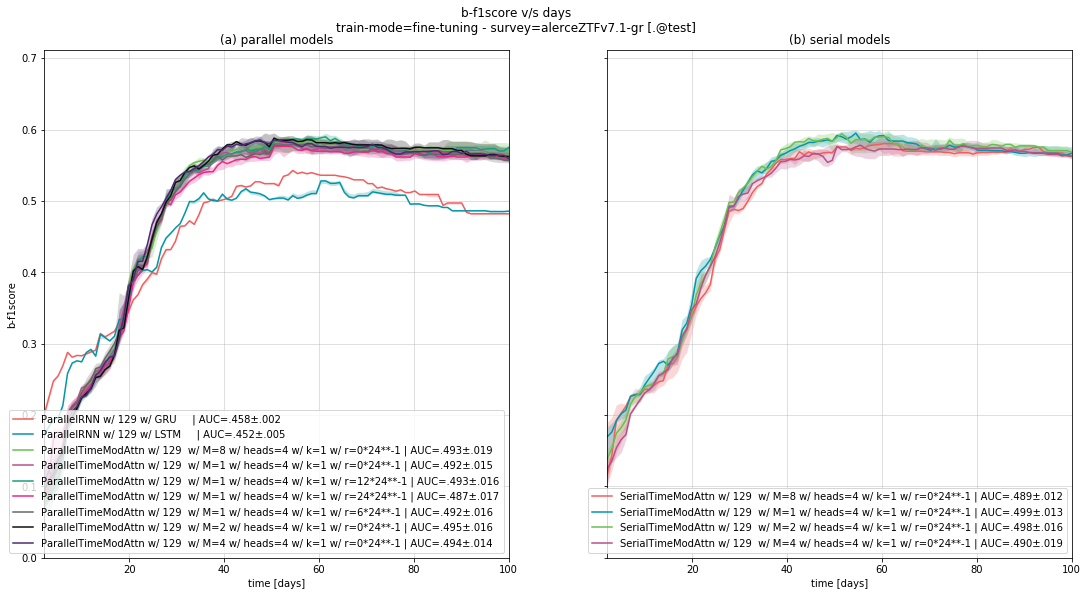

mdl=ParallelRNN~input_dims=1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~cell=GRU~b=129 ['0@id=1000c0', '0@id=1000c1', '0@id=1000c2'](3#)
mdl=ParallelRNN~input_dims=1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~cell=LSTM~b=129 ['0@id=1000c0', '0@id=1000c1', '0@id=1000c2'](3#)
mdl=ParallelTimeModAttn~input_dims=1~m=16~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=0*24**-1~enc_emb=g64-g64.r64-r64~dec_emb=g1-g128.r1-r128~b=129 ['0@id=1000c0', '0@id=1000c1', '0@id=1000c2', '0@id=1001c0', '0@id=1001c1', '0@id=1001c2', '0@id=1002c0', '0@id=1002c1', '0@id=1002c2', '1@id=1000c0', '1@id=1000c1', '1@id=1000c2', '1@id=1001c0', '1@id=1001c1', '1@id=1001c2', '1@id=1002c0', '1@id=1002c1', '1@id=1002c2', '2@id=1000c0', '2@id=1000c1', '2@id=1000c2', '2@id=1001c0', '2@id=1001c1', '2@id=1001c2', '2@id=1001c0', '2@id=1001c0', '2@id=1000c0', '3@id=1000c0', '3@id=1000c1', '3@id=1000c2', '3@id=1001c0', '3@id=1001c1', '3@id=1001c2', '3@id=1001c0', '3@id=1001c0', '3@id=1000c0', '4@id=1000c0',

mdl=SerialTimeModAttn~input_dims=1~m=4~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=0*24**-1~enc_emb=128-128~dec_emb=g1-g128.r1-r128~b=129 ['0@id=1000c0', '0@id=1000c1', '0@id=1000c2', '0@id=1001c0', '0@id=1001c1', '0@id=1001c2', '0@id=1002c0', '0@id=1002c1', '0@id=1002c2', '1@id=1000c0', '1@id=1000c1', '1@id=1000c2', '1@id=1001c0', '1@id=1001c1', '1@id=1001c2', '1@id=1002c0', '1@id=1002c1', '1@id=1002c2', '2@id=1000c0', '2@id=1000c1', '2@id=1000c2', '2@id=1001c0', '2@id=1001c1', '2@id=1001c2', '2@id=1002c0', '2@id=1002c1', '2@id=1002c2', '3@id=1000c0', '3@id=1000c1', '3@id=1000c2', '3@id=1001c0', '3@id=1001c1', '3@id=1001c2', '3@id=1001c0', '3@id=1001c0', '3@id=1000c0', '4@id=1000c0', '4@id=1000c1', '4@id=1000c2', '4@id=1001c0', '4@id=1001c1', '4@id=1001c2', '4@id=1001c0', '4@id=1001c0', '4@id=1000c0'](45#)
mdl=SerialTimeModAttn~input_dims=1~m=8~kernel_size=1~heads=4~fourier_dims=1~time_noise_window=0*24**-1~enc_emb=128-128~dec_emb=g1-g128.r1-r128~b=129 ['0@id=1000c0', '0@id

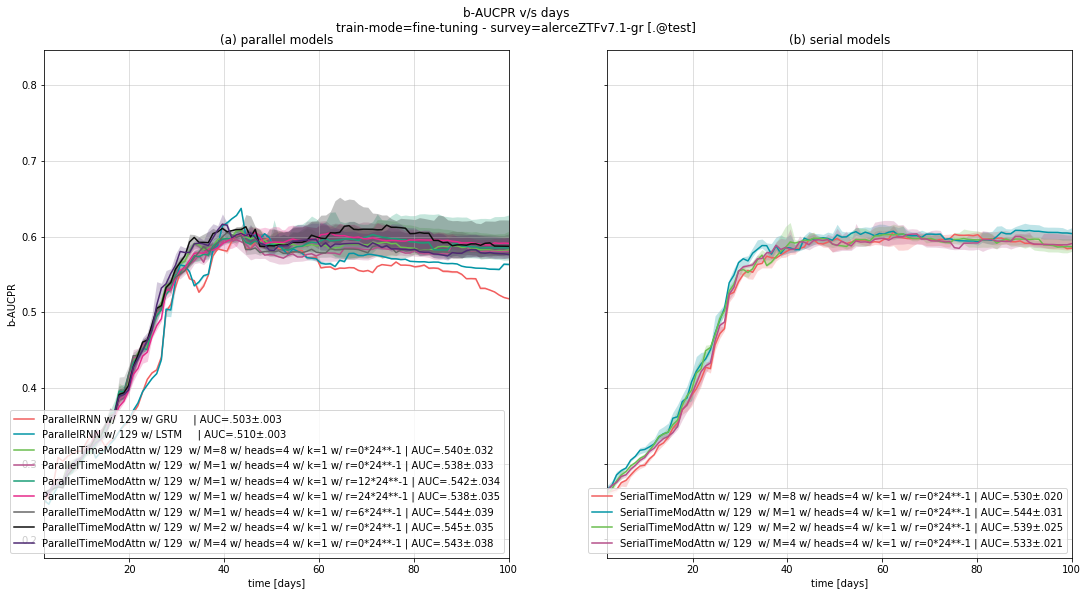

In [20]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from lcclassifier.results.performance import plot_metric

dmetrics = {
    f'b-aucroc':{'k':1, 'mn':'b-AUCROC'},
    #f'b-precision':{'k':1, 'mn':None},
    f'b-recall':{'k':1, 'mn':None},
    f'b-f1score':{'k':1, 'mn':None},
    f'b-aucpr':{'k':1, 'mn':'b-AUCPR'},
    }
plot_metric(rootdir, cfilename, kf, lcset_name, model_names, dmetrics,
    #'baselines_dict':baselines_dict,
    percentile=60, # None 50 60 95
    target_class=None, # None SLSN SNIbc SNII-b-n SNIa
    )

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.cm import plot_cm

lcset_name = 'test'
kwargs = {
    'export_animation':False, # False True
}
plot_cm(rootdir, cfilename, kf, lcset_name, model_names, **kwargs)

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.tables import get_ps_performance_df
from fuzzytools.latex.latex_tables import LatexTable

dmetrics = {
    f'b-precision':{'k':1, 'mn':None},
    f'b-recall':{'k':1, 'mn':None},
    f'b-f1score':{'k':1, 'mn':None},
    f'b-aucroc':{'k':1, 'mn':'b-AUCROC'},
    #f'b-aucpr':{'k':1, 'mn':'b-AUCPR'},
    }
kwargs = {
    'uses_avg':False, # False True
    'day':100,
    #'override_model_name':False, # False True
    'baseline_filedir':f'../temp/baseline~mode=all.df',
    }
info_df = get_ps_performance_df(rootdir, cfilename, kf, lcset_name, model_names, dmetrics, **kwargs)

for k in range(0, len(info_df)):
    info_df.indexs[k] = info_df.indexs[k].replace('=', '***').replace('model***', 'model=')
display(info_df())

caption = ''
caption += f'Baseline method v/s deep learning models.'
latex_kwargs = {
    'centered':False,
    'caption':caption,
    'label':'?',
    'bold_axis':'columns',
    'repr_replace_dict':{'***':'='},
}
latex_table = LatexTable(info_df(), **latex_kwargs)
print(latex_table)

In [ ]:
assert 0

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.plots import plot_temporal_encoding

lcset_name = f'train.{method}'
kwargs = {
    }
plot_temporal_encoding(rootdir, cfilename, kf, lcset_name, model_names, **kwargs)

In [ ]:
assert 0

In [ ]:
%load_ext autoreload
%autoreload 2
from lcclassifier.results.tables import get_ps_times_df
from fuzzytools.latex.latex_tables import LatexTable
from fuzzytools.lists import get_min_elements

kwargs = {
    }
info_df = get_ps_times_df(rootdir, cfilename, kf, method, model_names, **kwargs)

for k in range(0, len(info_df)):
    info_df.indexs[k] = info_df.indexs[k].replace('=', '***').replace('model***', 'model=')
display(info_df())

caption = ''
caption += f'Training optimization times from all autoencoder models iterations. Validation set evaluation is included in total time.'
latex_kwargs = {
    #'centered':
    'caption':caption,
    'label':'?',
    'bold_axis':'columns',
    #'hline_k':3,
    'repr_replace_dict':{'***':'='},
    'bold_function':get_min_elements,
}
latex_table = LatexTable(info_df(), **latex_kwargs)
print(latex_table)